[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


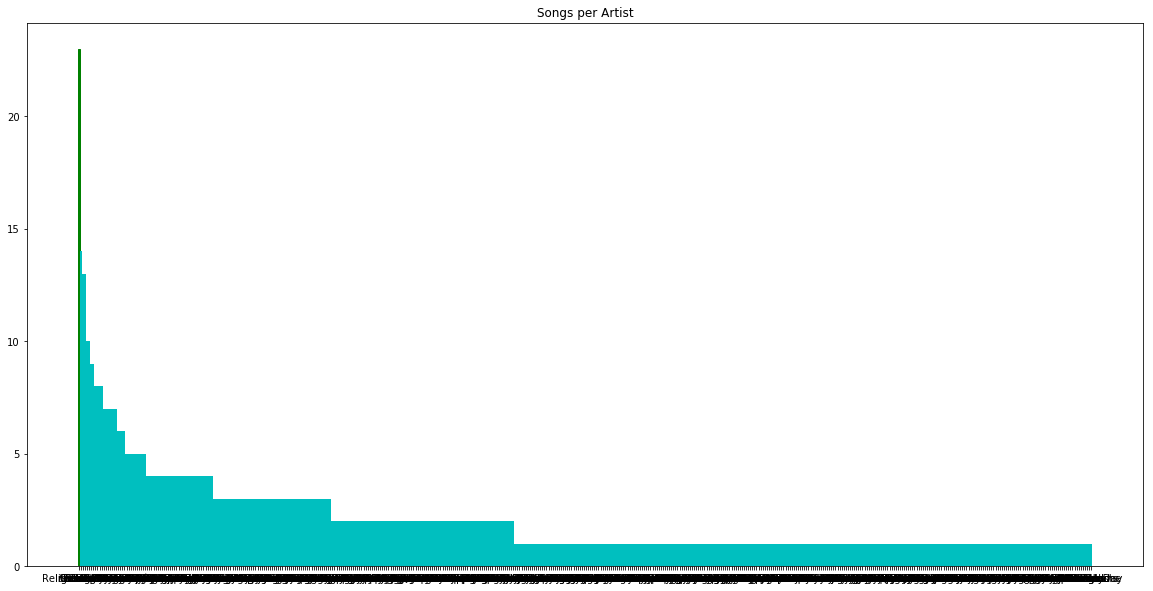

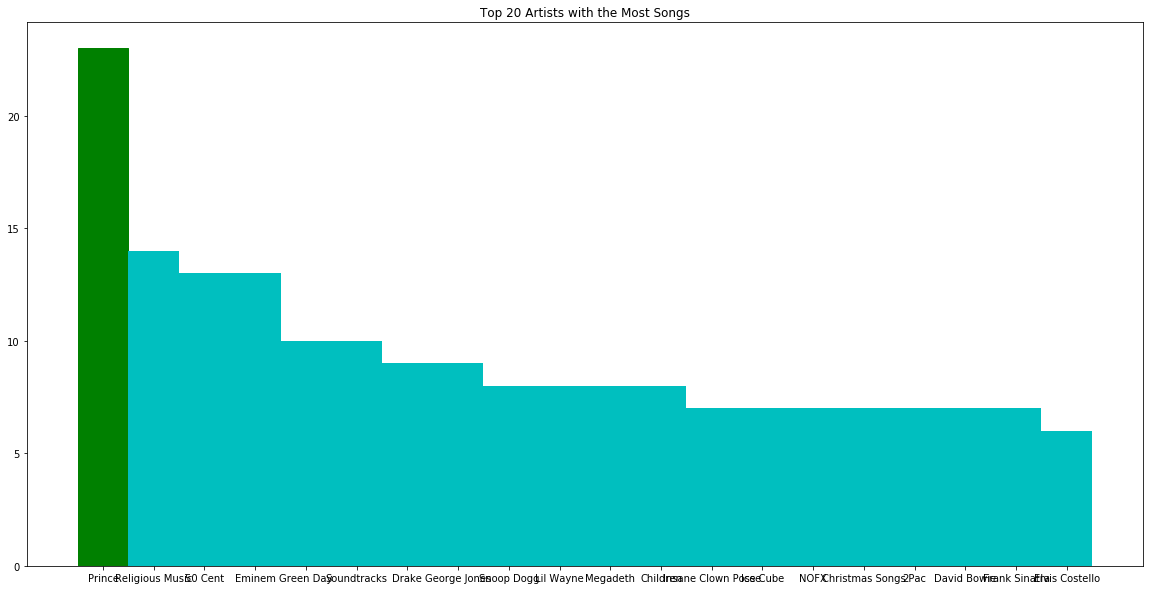

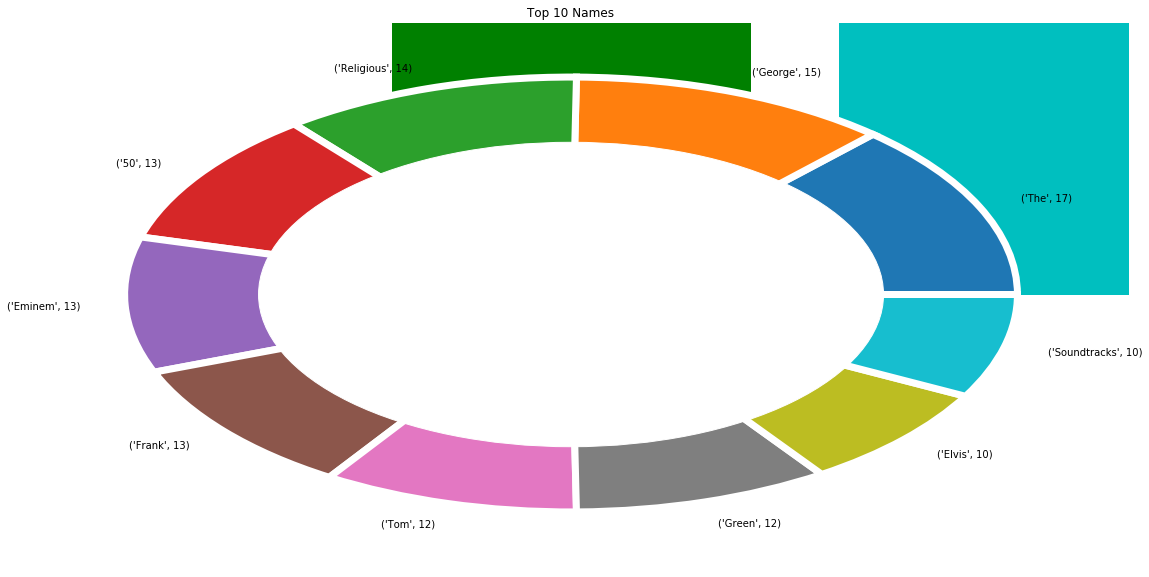

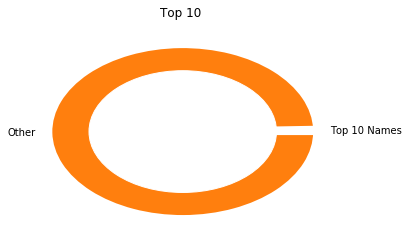

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 22 10:47:39 2017

@author: Vamsi Varma

"""

import matplotlib.pyplot as plt
import operator
from pylab import figure
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

class Saregamapa_Visualize():
    
    artist_map = {}
    songs_dict = {}
    
    def draw_artists_histogram(self):
        authors = sorted(self.artist_map.items(), key = operator.itemgetter(1), reverse = True)   
        values = [x[1] for x in authors]
        fig = figure(figsize=(20,10))
        barlist = plt.bar(range(len(authors)), values, color = 'c', width = 1)    
        categories = [y[0] for y in authors]
        plt.xticks(range(len(authors)), categories)
        plt.title("Songs per Artist")
        barlist[0].set_color('g')
        
        authors = authors[:20]
        values = [x[1] for x in authors]
        fig = figure(figsize=(20,10))
        barlist = plt.bar(range(len(authors)), values, color = 'c', width = 1)    
        categories = [y[0] for y in authors]
        plt.xticks(range(len(authors)), categories)
        plt.title("Top 20 Artists with the Most Songs")
        barlist[0].set_color('g')
        
    def search_for_popular_words(self):
    
        stop = set(stopwords.words('english'))
        wordsDict = {}
    
        
        #put all the lyrics in a list
        lyricsList = []
        for songId in self.songs_dict:
            lyricsList.append(self.songs_dict[songId][4])
            
        #for every song lyric
        for lyric in lyricsList:
            # removing all the stopwords from the lyric i
            iNoStop = lyric
            for i in stop:
                lyricWords = iNoStop.split()
                for e in range(len(lyricWords)):
                    if(i.lower() == lyricWords[e].lower()): 
                        lyricWords[e] = ''
                                    
                iNoStop = ' '.join(lyricWords)
            
            #updating the dictionary containing all the words
            for p in iNoStop.split():
                if(p.lower().strip() in wordsDict.keys()):
                    wordsDict[p.lower()] += 1
                else:
                    wordsDict[p.lower()] = 1
                                
    
        # this return the 20 most popular words (exclude stopwords)
        first20 = sorted(wordsDict.items(), key = operator.itemgetter(1), reverse = True)[:20]
    
        # this is the  histogram of the number of occurence per word for the 20 most popular words
        values2 = [x[1] for x in first20]
        fig=figure(figsize=(20,10))
        barlist2 = plt.bar(range(len(first20)),values2, color = 'c')
        category2 = [y[0] for y in first20]
        plt.title("20 Most Popular Words")
        plt.xticks(range(len(first20)), category2)
        barlist2[0].set_color('g')
    
    def search_for_popular_artist_names(self):
        authorDict = {}
    
        for author in self.artist_map:
            
            first_name = author.split(' ', 1)[0]
            
            if first_name in authorDict:
                authorDict[first_name] += self.artist_map[author]
            else:
                authorDict[first_name] = self.artist_map[author]
        
        first10 = sorted(authorDict.items(), key = operator.itemgetter(1), reverse = True)[1:11]
    
        #print(first10)
        #confront the number of songs composed by the top 10 artist names
        values = []
        labels = []
        top = 0
        for art in first10:
            values.append(art[1])    
            labels.append((art[0],art[1]))
            top += art[1]
        
        plt.pie(values, labels=labels, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
        
        # add a circle at the center
        my_circle=plt.Circle( (0,0), 0.7, color='white')
        p=plt.gcf()
        p.gca().add_artist(my_circle)
        plt.title("Top 10 Names")
         
        plt.show()
        
        #Confront the songs of the top 10 artist names with the others
        values1 = [top]
        labels1 = ["Top 10 Names"]
        values1.append(30000 - top)    
        labels1.append("Other")
        
        plt.pie(values1, labels=labels1, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
        
        # add a circle at the center
        my_circle=plt.Circle( (0,0), 0.7, color='white')
        p=plt.gcf()
        p.gca().add_artist(my_circle)
        plt.title("Top 10 ")
        plt.show()
    
    def plot_songs_lengths_histogram(self, wordCountDict):
    
        #histogramof the song lengths
        countList = sorted(wordCountDict.items(), key = operator.itemgetter(1), reverse = True)
        values = [x[1] for x in countList]
        fig = figure(figsize=(20,10))
        barlist = plt.bar(range(len(countList)), values, color = 'c', width = 1)
        category = [y[0] for y in countList]
        plt.title("Length of all 30000 Songs")
        plt.xticks(range(len(countList)), category)
        barlist[0].set_color('g')
        
        #histogramof the song lengths of the 20 logest songs
        countList = countList[:20]
        values = [x[1] for x in countList]
        fig = figure(figsize=(20,10))
        barlist = plt.bar(range(len(countList)), values, color = 'c', width = 1)
        category = [y[0] for y in countList]
        plt.title("Length of the 20 Longest Songs")
        plt.xticks(range(len(countList)), category)
        barlist[0].set_color('g')
    
    def song_word_count_with_out_repitition(self):
        
        wordCountDict = {} #length of the song without counting repetitions
        for songId in self.songs_dict:
            curSong = self.songs_dict[songId]
            wordCountDict[curSong[1]]=len(set(curSong[4]))
    
        self.plot_songs_lengths_histogram(wordCountDict)
    
    
    def song_word_count_with_repitition(self):
    
        wordCountDict = {} #length of the song without counting repetitions
        for songId in self.songs_dict:
            curSong = self.songs_dict[songId]
            wordCountDict[curSong[1]] = len(curSong[4])
        
        self.plot_songs_lengths_histogram(wordCountDict)
    
    def get_artist_map(self, artist_list):
        
        a_map = {}
        
        
        for artist in artist_list:
            a_map[artist["artist_name"]] =  artist["songs_count"]   
        
        return a_map
        

    def __init__(self, smeta):
        
        self.songs_dict = smeta["songs_dict"]
        self.artist_map = self.get_artist_map(smeta["artist_dict_list"])

        self.draw_artists_histogram()
        
        self.search_for_popular_words()
        
        self.search_for_popular_artist_names()
        
        self.song_word_count_with_repitition()
        
        self.song_word_count_with_out_repitition()
        

from pymongo import MongoClient

class Saregamapa_Mongo:

    db = ""
        
    def save(self, cName, data): 
        cObj = self.db[cName]
        
        #@TODO: If there are more records then insert 1000 records at a time
        cObj.insert_many(data)  
    
    def save_one(self, cName, data): 
        cObj = self.db[cName]
        
        cObj.insert_one(data)
    
    def get(self, cName):
        
        data = list(self.db[cName].find({}))
        result = []
        
        for d in data:
            result.append(d)
        
        return result
    
    def get_db_collections(self):
        return self.db.collection_names(include_system_collections=False)
          
    def __init__(self, dbName):
        connection = MongoClient('localhost',27017)
        self.db = connection[dbName]

smongo = Saregamapa_Mongo("saregamapa") 


parse_dict = {
            "songs_collection": "songs_1000",
            "artist_collection": "artists_map_1000",
            "iindex_collection": "iindex_1000",
            "folder_name": "\lyrics_collection",
            "max_songs": 1000
        }

smeta = {
            "songs_dict": {},
            "artist_dict_list": [],
            "documents_meta": [],
            "sindexes": [],
            "sQuery": "love sun",
            "clusters_count": 3
            } 

collection_list = smongo.get_db_collections()


def generate_dict_fromlist(dict_list):
        
        dict_consolidated = {}
        
        for curDict in dict_list:
            
            curDict.pop('_id', None) 
            dict_consolidated.update(curDict)
        
        return dict_consolidated


smeta["songs_dict"] = generate_dict_fromlist(smongo.get(parse_dict["songs_collection"])) 
smeta["artist_dict_list"] = smongo.get(parse_dict["artist_collection"])
     
Saregamapa_Visualize(smeta)
        
                